In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import R2Score, MeanAbsoluteError, MeanAbsolutePercentageError
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
# Charger votre jeu de données
data = pd.read_csv('C:/Users/utilisateur/2024/E1/data/data.csv')


In [4]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])


# Split data into training and testing sets
X_train, X_test = train_test_split(numeric_data, test_size=0.2, random_state=42)

X_test_original = X_test.copy()

# Introduce missing values in 10% of the test data
np.random.seed(42)
mask = np.random.rand(*X_test.shape) < 0.1
X_test[mask] = np.nan




In [5]:
X_test_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 1516 to 565
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2555 non-null   int64  
 1   Price                     2555 non-null   int64  
 2   Levy                      2555 non-null   int64  
 3   Engine volume             2555 non-null   float64
 4   Mileage(km)               2555 non-null   int64  
 5   Cylinders                 2555 non-null   float64
 6   Airbags                   2555 non-null   int64  
 7   Fuel type_CNG             2555 non-null   int64  
 8   Fuel type_Diesel          2555 non-null   int64  
 9   Fuel type_Hybrid          2555 non-null   int64  
 10  Fuel type_Hydrogen        2555 non-null   int64  
 11  Fuel type_LPG             2555 non-null   int64  
 12  Fuel type_Petrol          2555 non-null   int64  
 13  Fuel type_Plug-in Hybrid  2555 non-null   int64  
dtypes: float64(

In [6]:
# Confirm that missing values were introduced
print("Missing values in X_test:", X_test.isna().sum().sum())

Missing values in X_test: 3589


In [7]:
print("values in X_test:", X_test.notna().sum().sum())

values in X_test: 32181


In [8]:
# Initialize and fit the custom model
model = KNNImputer(n_neighbors=5, weights="uniform")

X_test_imputed  = model.fit_transform(X_test)

X_test_imputed = pd.DataFrame(X_test_imputed, columns=numeric_data.columns)

In [9]:
X_test_imputed

,ID,Price,Levy,Engine volume,Mileage(km),Cylinders,Airbags,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,45649679.0,5018.0,1399.0,3.5,167222.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,45815912.0,2979.0,751.0,2.4,191848.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,45766261.0,3616.0,1399.0,3.5,199362.2,6.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,45647655.8,314.0,2410.0,6.2,274771.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,45518833.2,70.0,655.8,1.8,50000.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,45506364.0,17876.0,749.0,2.4,134360.4,4.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2551,45764477.0,29793.0,1053.0,3.5,219030.0,6.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2552,45659176.2,28225.0,707.0,2.0,200000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2553,45811158.0,706.0,835.8,2.4,275654.0,4.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# comp = X_test_original.compare(X_test_imputed)

In [10]:
# Calculate and compare statistics
stats_original = X_test_original.describe().T[['mean', 'std']]
stats_imputed = X_test_imputed.describe().T[['mean', 'std']]

comparison_stats = pd.concat([stats_original, stats_imputed], axis=1, keys=['Original', 'Imputed'])
print(comparison_stats)

                              Original                     Imputed  \
                                  mean           std          mean   
ID                        4.557061e+07  1.019945e+06  4.558744e+07   
Price                     1.228253e+04  9.717646e+03  1.251908e+04   
Levy                      5.936603e+02  5.527737e+02  5.976589e+02   
Engine volume             2.281605e+00  9.054078e-01  2.247147e+00   
Mileage(km)               2.233514e+06  6.323057e+07  2.479485e+06   
Cylinders                 4.565166e+00  1.195119e+00  4.544658e+00   
Airbags                   6.943640e+00  4.363921e+00  6.795460e+00   
Fuel type_CNG             2.739726e-02  1.632700e-01  2.637965e-02   
Fuel type_Diesel          1.565558e-01  3.634526e-01  1.509980e-01   
Fuel type_Hybrid          2.407045e-01  4.275949e-01  2.463405e-01   
Fuel type_Hydrogen        0.000000e+00  0.000000e+00  0.000000e+00   
Fuel type_LPG             1.956947e-02  1.385425e-01  1.604697e-02   
Fuel type_Petrol    

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12144\501453816.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_sampled[feature_name], label='Original', fill=True)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12144\501453816.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_imputed_sampled[feature_name], label='Imputed', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


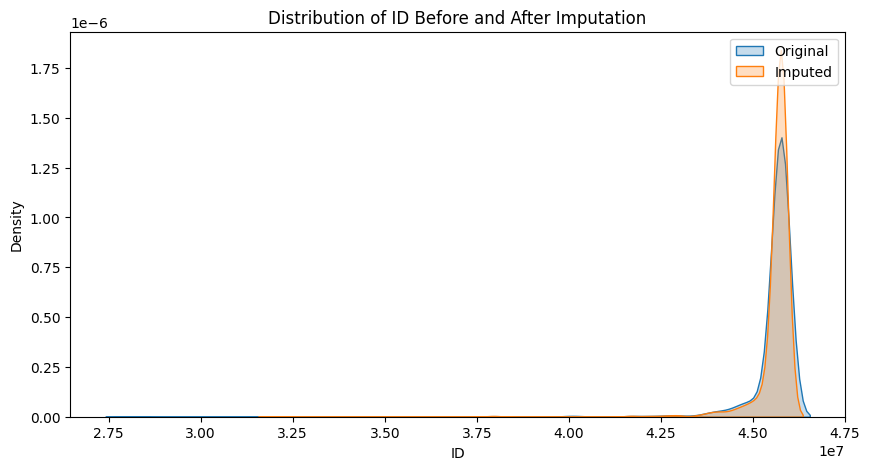

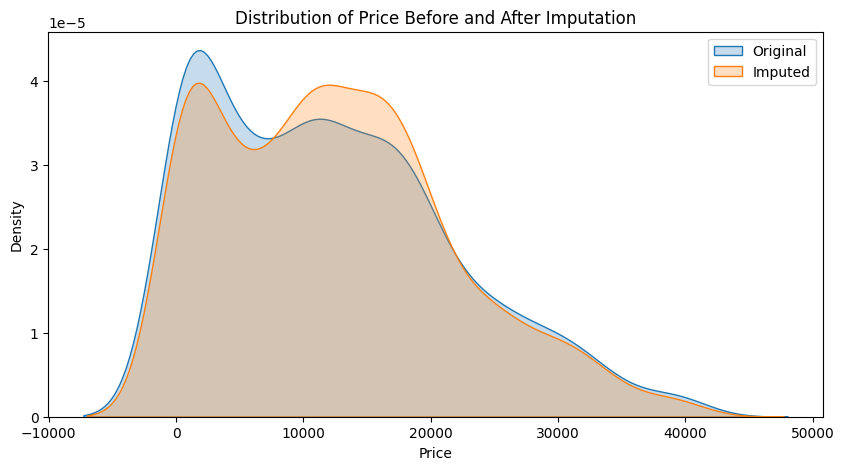

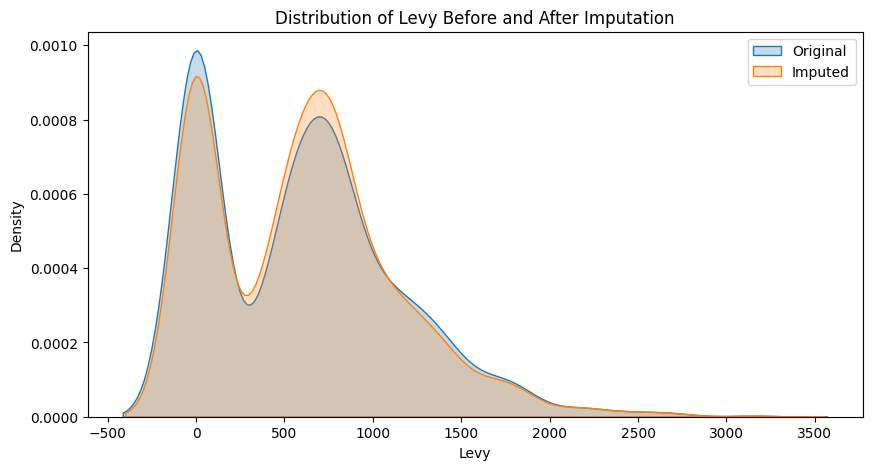

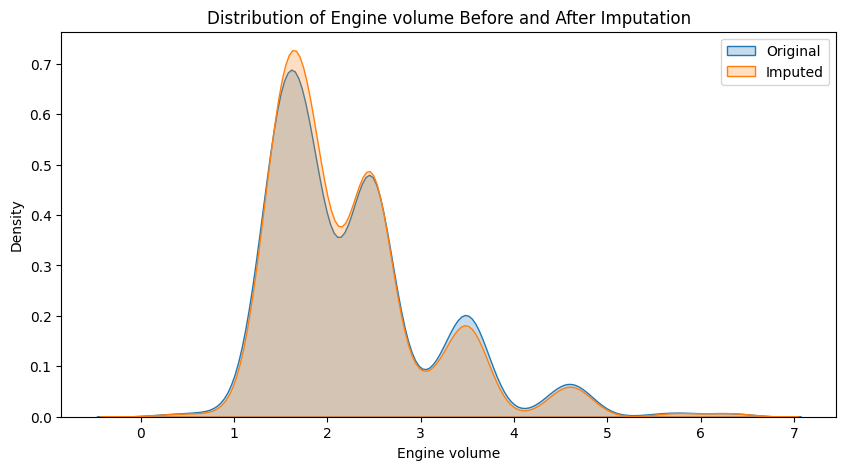

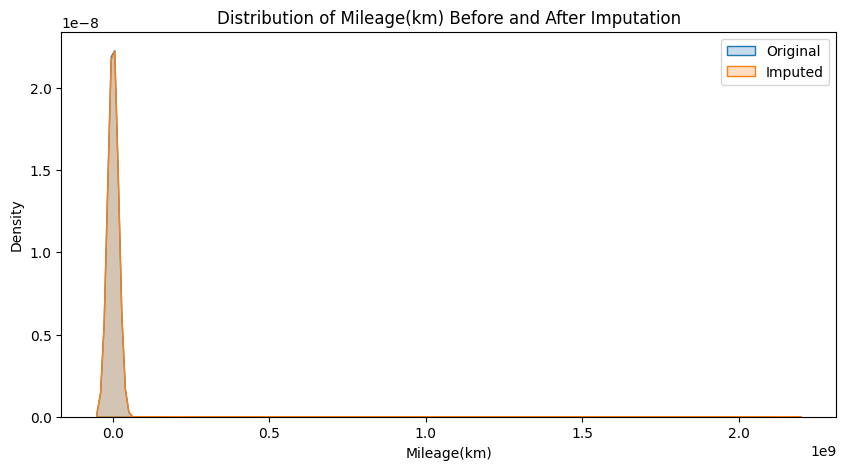

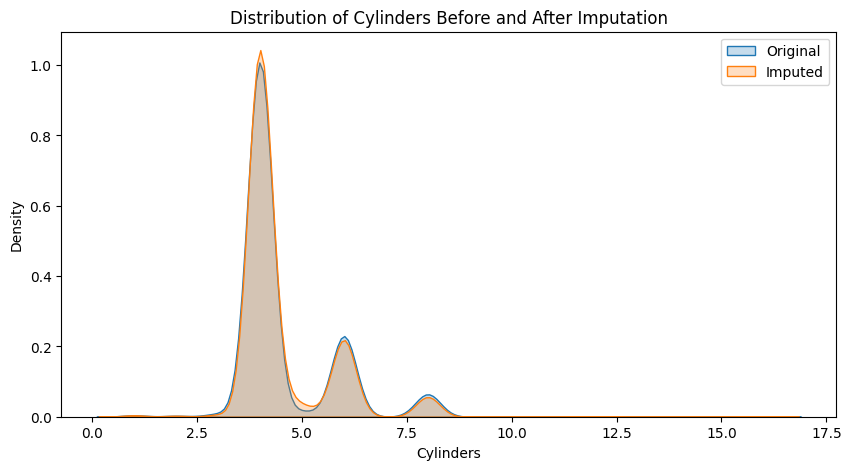

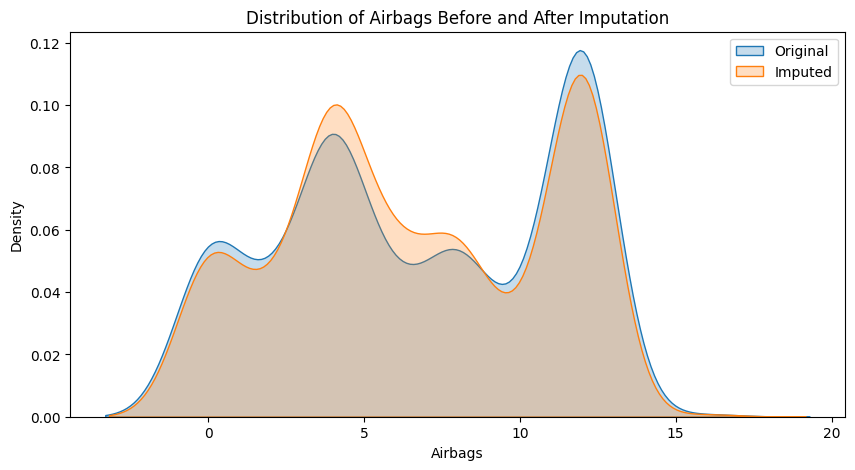

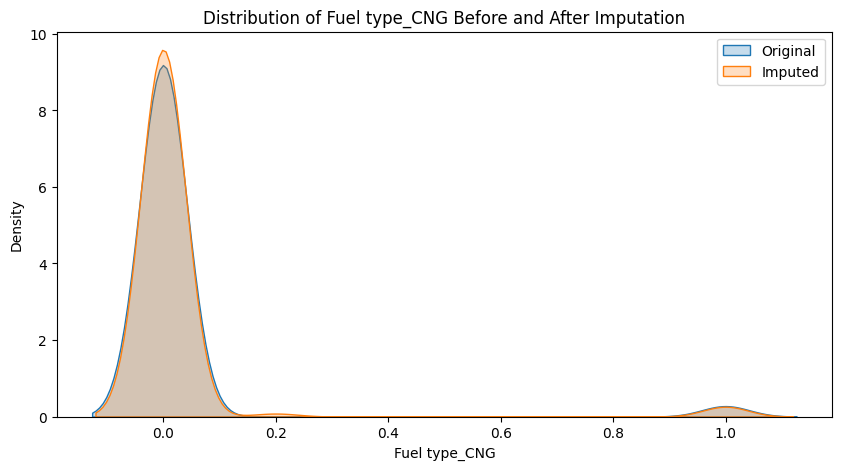

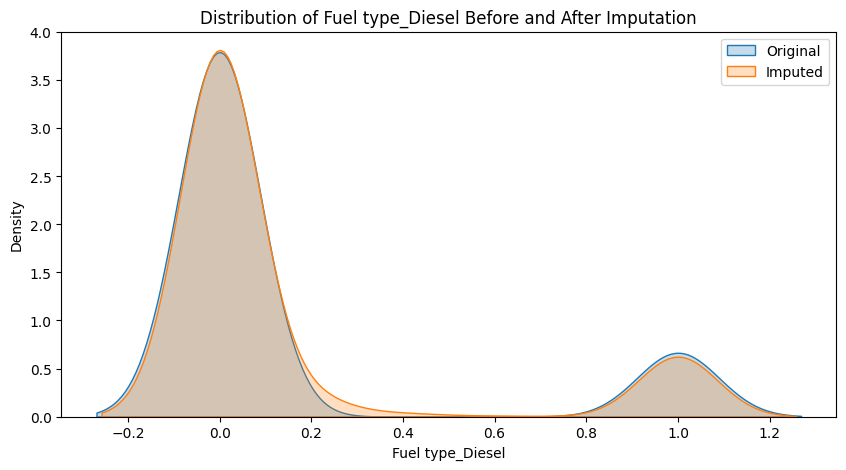

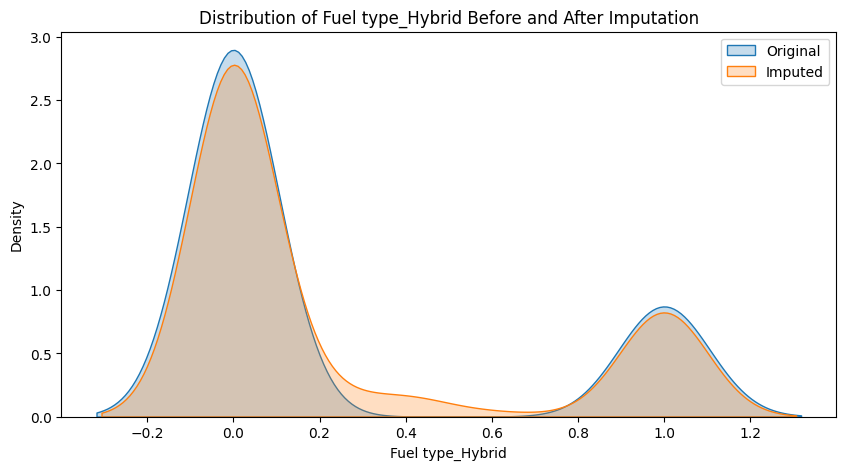

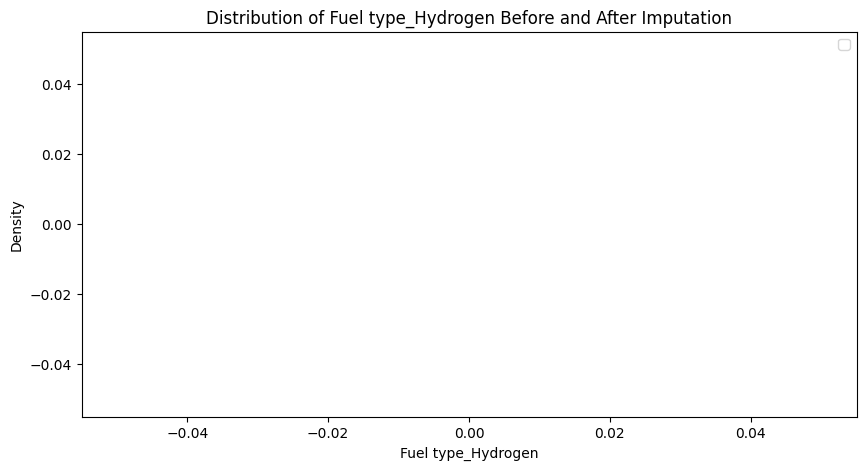

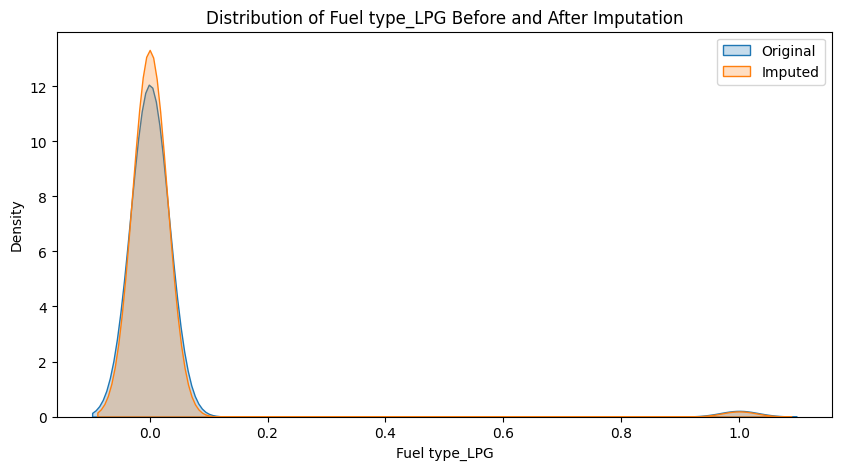

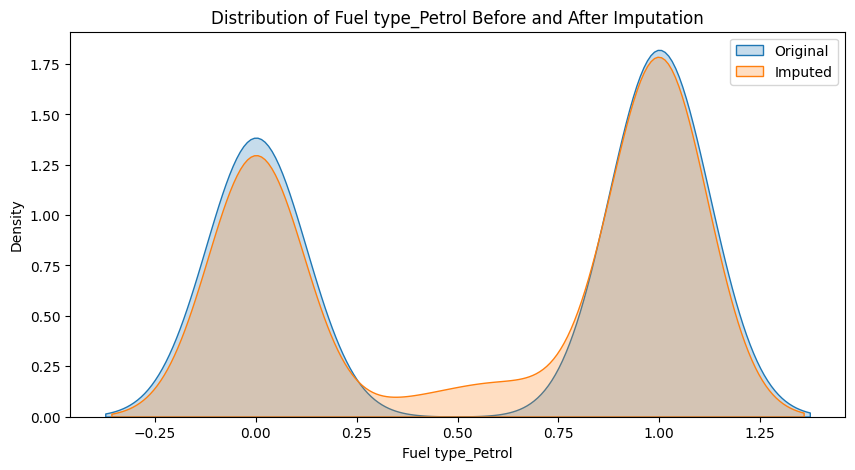

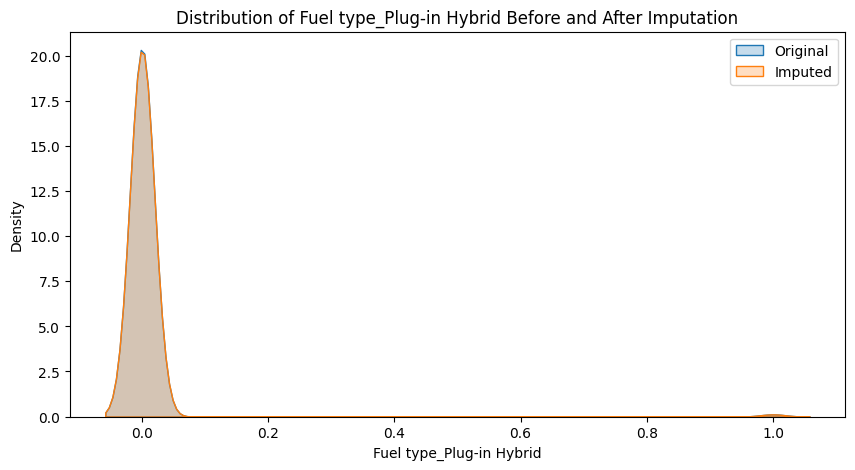

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly sample data for visualization to manage memory usage
sample_size = 1000  # Adjust based on your available memory
indices = np.random.choice(X_test.shape[0], sample_size, replace=False)

# Create a DataFrame for sampled original data
data_sampled = X_test_original.iloc[indices]

# Assuming data_imputed is a DataFrame and has the same index as `data`
data_imputed_sampled = X_test_imputed.iloc[indices]

for col in X_test.columns: 
    
    feature_name = col 
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data_sampled[feature_name], label='Original', fill=True)
    sns.kdeplot(data_imputed_sampled[feature_name], label='Imputed', fill=True)
    plt.title(f'Distribution of {feature_name} Before and After Imputation')
    plt.legend()


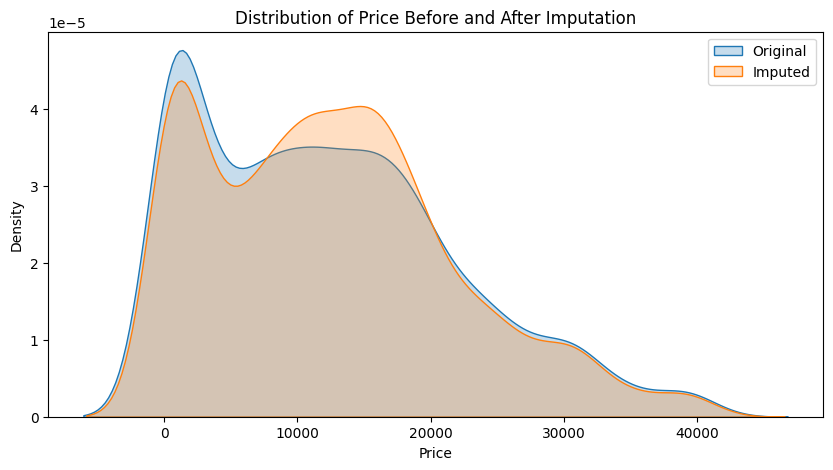

In [20]:
# Choose a feature for detailed comparison
feature_name = 'Price'  # Replace with your actual feature name

plt.figure(figsize=(10, 5))
sns.kdeplot(X_test_original[feature_name], label='Original', fill=True)
sns.kdeplot(X_test_imputed[feature_name], label='Imputed', fill=True)
plt.title(f'Distribution of {feature_name} Before and After Imputation')
plt.legend()


In [11]:
# Enregistrer le modèle en tant que fichier pickle
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
